Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from queue import PriorityQueue
from matplotlib import colors

###**Graph Based Search Algorithms : BFS,DFS**###

**print_state :** This function is used to plot the color grid.

In [3]:
def print_state(grid):
  #make a color map of fixed colors
  cmap = colors.ListedColormap(['black','firebrick','limegreen','gold','dodgerblue'])
  bounds=[-1.5,-0.5,0.5,1.5,2.5,3.5]
  norm = colors.BoundaryNorm(bounds, cmap.N)
  #tell imshow about color map so that only set colors are used
  img = plt.imshow(grid,cmap=cmap, norm=norm)
  #make a color bar
  plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[-1,0,1,2,3])
  plt.show()

    -1 -> Blocked state
    0  -> Start state
    1  -> Goal state
    2  -> Explored state
    3  -> Frontier


**heuristic_unbl :** This function calulates the heuristic of a given state.(Uses the cost of the unblocked case as a heuristic to solve for the blocked case)

In [4]:
def heuristic_unbl(state_x,state_y,goal_x,goal_y):
  return abs(state_x - goal_x) + abs(state_y - goal_y)

**A_star_search :** This fucntion performs A* algorithm and finds a path from start state to goal state.

In [5]:
def A_star_search(grid,start,goal):
  #Initializing and filling all the required numpy arrays.
  n = grid.shape[0]
  explored_matrix = np.empty((n,n))
  explored_matrix.fill(False)
  parent_matrix = np.empty((n,n,2))
  parent_matrix.fill(-1)

  #performing graph algorithm
  x = start[0]#coordinates of start state.
  y = start[1]
  p_queue = PriorityQueue()#instantiating priority queue.
  p_queue.put((0,(x,y)))#inserting node into queue(counter,coodinates)
  explored_matrix[x][y] = True
  counter = 1#used in priority queue insertion.
  action = [(-1,0),(1,0),(0,-1),(0,1)]#list of actions (UP,DOWN,LEFT,RIGHT)
  flag = True#to stop the loop when goal state is reached.

  while (p_queue.empty() == False):
    point = p_queue.get()#getting the node from queue.
    x = point[1][0]#getting coodinates of point.
    y = point[1][1]
    if (grid[x][y] == 3):#if the point is in frontier,make it explored.
      grid[x][y] = 2
    for i in action:#iterating through each action and finding a valid state.
      #coordinates of new point
      temp_x = x + i[0]
      temp_y = y + i[1]
      if (temp_x >= 0 and temp_x < n and temp_y >= 0 and temp_y < n):
        if (explored_matrix[temp_x][temp_y] == False and grid[temp_x][temp_y] != -1):
          if (grid[temp_x][temp_y] != 1):#if given state is not goal state,push it into frontier.
            grid[temp_x][temp_y] = 3 
          explored_matrix[temp_x][temp_y] = True
          parent_matrix[temp_x][temp_y] = [x,y]#allocating previous state/coordinates.
          p_queue.put((counter + heuristic_unbl(temp_x,temp_y,goal[0],goal[1]),(temp_x,temp_y)))#pushing the node into queue along with the calculated heuristic function.
          counter += 1#incrementing counter.
          if (temp_x == goal[0] and temp_y == goal[1]):#if goal state is reached,make flag false and break from the loop.
            flag = False
            break
    print_state(grid)#plotting the color plot.
    if (flag == False):#if flag is false,break from while loop.
      break

  #printing the path
  print("\n")
  path = []
  while (goal != [-1,-1]):
    path.append(goal)
    p_x = parent_matrix[int(goal[0])][int(goal[1])]
    goal = p_x.tolist()
  path.reverse()
  if (int(path[0][0]) == int(start[0]) and int(path[0][1]) == int(start[1])):
    print("Path from start to goal : ")
    print(path[0],end = "")
    for i in path[1:]:
      print(" --> ",i,end = "")
    print("\n")
  else :
    print("There is no path from start to goal.")

Accepting inputs 

In [6]:
#grid size
n = int(input("Enter n : "))
grid = np.zeros((n,n))

#bocked locations
bl = int(input("Enter number of blocked locations : "))
flag = input("Do you want to enter the coordinates of blocked locations ?(Y/n)")
if (flag.lower() == 'y'):
  for i in range(bl):
    x = int(input("Enter x-cordinate of point " + str(i) + " : "))
    y = int(input("Enter y-cordinate of point " + str(i) + " : "))
    grid[x][y] = -1
else :
  for i in range(bl):
    x = np.random.randint(0,n)
    y = np.random.randint(0,n)
    grid[x][y] = -1

#coordinates of start state.
start_x = int(input("Enter x-coordinate of start state : "))
start_y = int(input("Enter y-coordinate of start state : "))
grid[start_x][start_y] = 0
start = [start_x,start_y]

#coordinates of goal state.
goal_x = int(input("Enter x-coordinate of goal state : "))
goal_y = int(input("Enter y-coordinate of goal state : "))
grid[goal_x][goal_y] = 1
goal = [goal_x,goal_y]

Enter n : 10
Enter number of blocked locations : 5
Do you want to enter the coordinates of blocked locations ?(Y/n)n
Enter x-coordinate of start state : 2
Enter y-coordinate of start state : 3
Enter x-coordinate of goal state : 5
Enter y-coordinate of goal state : 6


Performing A* search

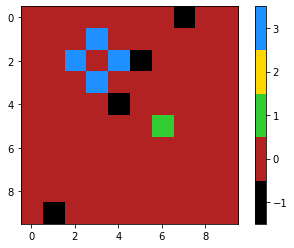

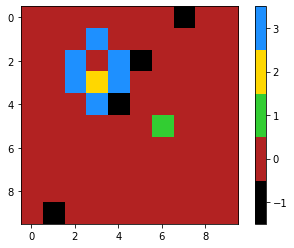

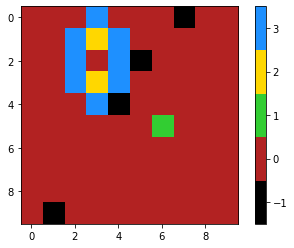

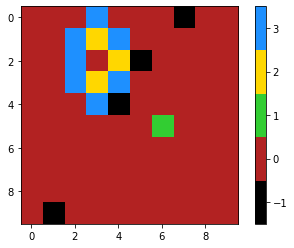

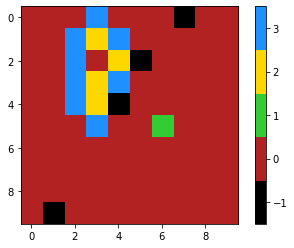

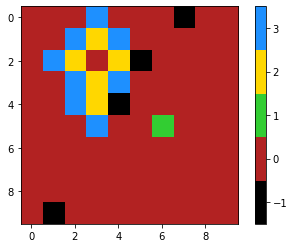

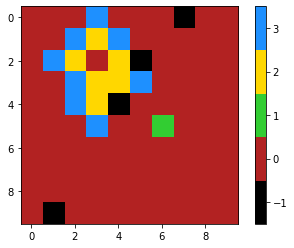

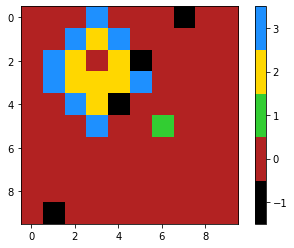

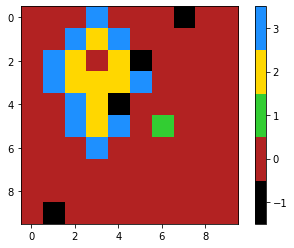

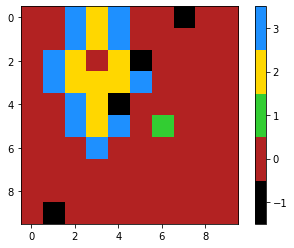

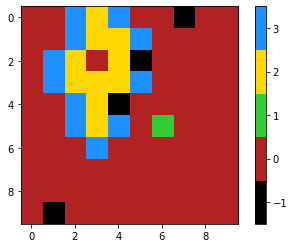

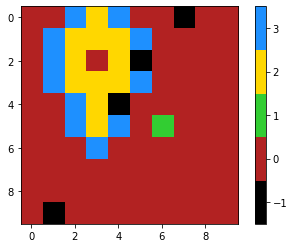

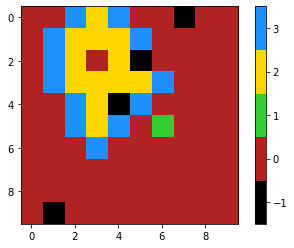

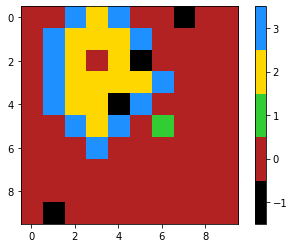

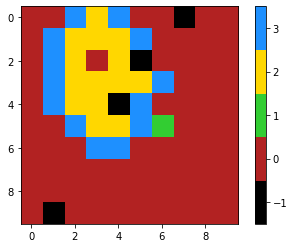

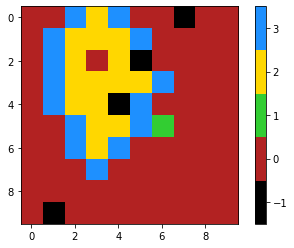

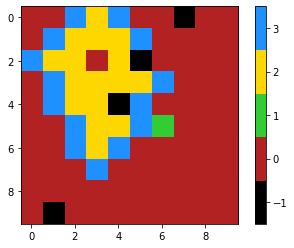

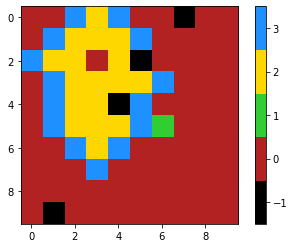

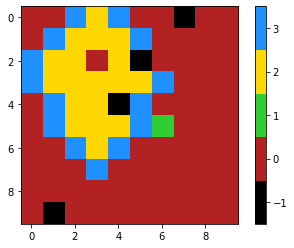

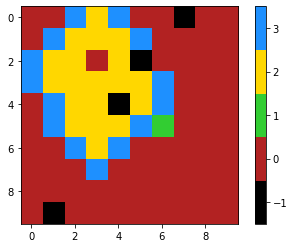

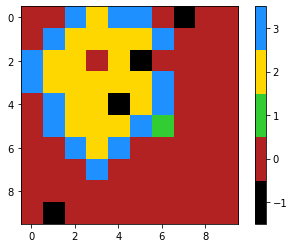

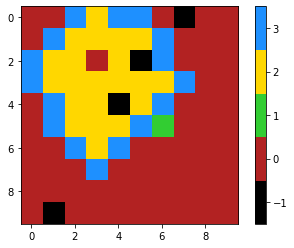

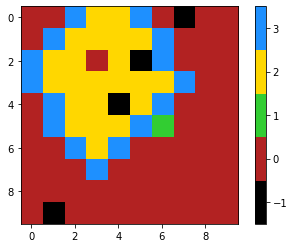

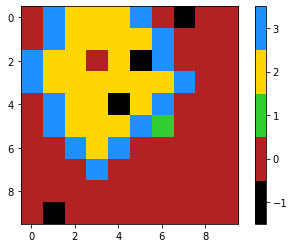

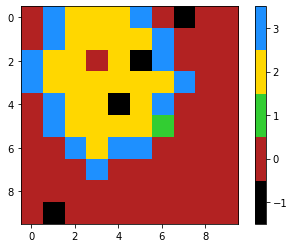



Path from start to goal : 
[2.0, 3.0] -->  [3.0, 3.0] -->  [4.0, 3.0] -->  [5.0, 3.0] -->  [5.0, 4.0] -->  [5.0, 5.0] -->  [5, 6]



In [7]:
A_star_search(grid,start,goal)

###**Q3.Puzzle-Solver**###

**heuristic_manhattan :** This function is used to calculate the heuristic of the given state.(Uses the summation of the distance required by every number to travel to its final position (in the goal state) as a heuristic)

In [8]:
def heuristic_manhattan(string):
  goal = "1234567ss"#goal state
  dis = 0
  for i,c in enumerate(string):
    if (c != 's'):
      state_x = int((i)/3)#x-coordinate of number in given state.
      state_y = int((i)%3)#y-coordinate of number in given state.
      goal_x = int((int(c) - 1)/3)#x-coordinate of number in goal state.
      goal_y = int((int(c) - 1)%3)#y-coordinate of number in goal state.
      dis += abs(state_x - goal_x) + abs(state_y - goal_y)#adding the manhattan distance.
  return dis#returning the distance.

**grid_string :** This function is used to create a string from the given array/grid of characters.

In [9]:
def grid_string(grid):
  s = ""#empty string
  for row in grid:#iterating through each element in the string.
    for ele in row:
      s += str(ele)
  return s#returning the string

**string_grid :** This function is used to create a grid(a 2D list) from the given string.

*In the string,char at 'i' corresponds to char at [i/3,i%3] in grid.*

In [10]:
def string_grid(string):
  grid = [[0 for i in range(3)] for j in range(3)]#instantiating a list filled with 0
  for i in range(len(string)):#iterating through each char of string and placing the char at appropriate position.
    grid[int(i/3)][int(i%3)] = string[i]
  return grid#returning the grid

**fill_states :** This function is used to find all permutations of given string and push each permutation into a dictionary(called "all_states") labelled with a new integer.

In [11]:
def permutations(puzzle_string,s = ""):
  if len(puzzle_string) == 0:
      if s not in all_states:#if string is not in the dictionary,
        global count
        all_states[s] = count#insert into dictionary
        count += 1#increment count
  #code for finding permuations of string.
  for i in range(len(puzzle_string)):
      new_s = s + puzzle_string[i]
      rem = puzzle_string[0:i] + puzzle_string[i+1:]
      permutations(rem, new_s)

After running the above function on our final goal state,we get all the required states.

In [12]:
all_states = {}#dictionary to store all states.
count = 1#global var.
permutations("1234567ss")
print("Total number of states(9!/2): ",count-1)#as the count starts from 1.

Total number of states(9!/2):  181440


Initializing and filling all the required numpy arrays.

In [13]:
num_states = count#total no of states + 1
explored_list = np.empty(num_states)#arr to store explored states.
explored_list.fill(False)
parent_list = np.zeros(num_states)#arr to store parent states.
index_of_number = np.zeros(num_states)#arr to store the index of number to be moved at each step
action_list = np.empty((num_states,2))#arr to store what action was done to obtain a particular state.
action_list.fill(-1)

**A_star_solver :** Finding the shortest path using A* algorithm.

In [14]:
def A_star_solver(goal_state,start_state):
  goal_str = grid_string(goal_state)#converting the input grid into a string.
  start_str = grid_string(start_state)
  p_queue = PriorityQueue()#instantiating a priority queue
  p_queue.put((0,goal_str))#inserting the first node(counter,state)
  explored_list[all_states[goal_str]] = True
  action = [(-1,0),(1,0),(0,-1),(0,1)]#list of actions (UP,DOWN,LEFT,RIGHT)
  counter = 1#used in priority queue insertion.
  flag = True#to stop the loop when start state is reached.
  while (p_queue.empty() == False):#do this until queue is empty
    node = p_queue.get()#getting the first node
    curr_state = node[1]#getting the state
    empty_list = []#list to store postions of 's'(empty space) in string.
    for index in range(9):
      if (curr_state[index] == 's'):
        empty_list.append(index)
    for i in empty_list:#for each 's'(empty space) in string,we find the avaiable steps.
      if (flag == False):#if flag is false,break from the loop.
        break
      for j in action:#doing each action and checking for valid steps
        temp_x = int(i/3) + j[0]
        temp_y = int(i%3) + j[1]
        if (temp_x >= 0 and temp_x < 3 and temp_y >= 0 and temp_y < 3):
          new_index = 3*temp_x + temp_y
          #finding the new state
          if (curr_state[new_index] != 's'):
            temp_list = list(curr_state)
            temp_list[new_index],temp_list[i] = temp_list[i],temp_list[new_index]   
            new_state = ''.join(temp_list)
            state_index = all_states[new_state] 
            if (explored_list[state_index] == False):#if the found state is not yet explored,we push it into p_queue
              explored_list[state_index] = True
              parent_list[state_index] = int(all_states[curr_state])#allocating parent state
              index_of_number[state_index] = i#index of number to be moved.
              #action for the state
              action_list[state_index][0] = j[0]
              action_list[state_index][1] = j[1]
              if (new_state == start_str):#if the new state is the start state,
                p_queue = PriorityQueue()#empty the priority queue.
                flag = False#make flag false and break.
                break
              else :                  
                p_queue.put((counter + heuristic_manhattan(new_state),new_state))#pushing the node into queue along with the calculated heuristic function.
                counter += 1#incrementing the counter.   

**path** : This function is used to print the action performed and puzzle config at each step.

In [15]:
def path(start):
  start_str = grid_string(start)#converting the input grid into a string.
  state_index = all_states[str(start_str)]#getting the index/label of given state from  dictionary
  if (explored_list[state_index] == False):#if not explored,then the given state cannot be formed.
    "The given state cannot be transformed to final goal state."
  else :
    path = []#list to store states/path to solution.
    temp = state_index
    while (temp != 0):#storing the solution in list.(x,parent(x),parent(parent(x))....)
      path.append(int(temp))
      temp = parent_list[int(temp)]
    #printing accordingly.
    for i in range(len(path)):
      if (i == 0):
        print("Initial State : ")
      string = list(all_states.keys())[list(all_states.values()).index(path[i])]
      grid = string_grid(string)
      for j in range(3):
        print(grid[j])
      if (i != len(path) - 1):
        a = action_list[path[i]]
        action = ""
        if (a[0] == -1 and a[1] == 0):
          action = "UP"
        elif (a[0] == 1 and a[1] == 0):
          action = "DOWN"
        elif (a[0] == 0 and a[1] == -1):
          action = "LEFT"
        elif (a[0] == 0 and a[1] == 1):
          action = "RIGHT"
        a = int(index_of_number[path[i]])
        print("Move number",string[a],action,"\n")
      else :
        print("Goal achieved!")
    print("\n")
    print("Total number of states to reach the final goal : ",len(path) - 1,"\n")

Accepting goal state input from user

In [16]:
goal_grid = [[0 for i in range(3)] for j in range(3)]
print("Enter goal state : ")
for i in range(3):
  goal_grid[i][0],goal_grid[i][1],goal_grid[i][2] = input().split()

Enter goal state : 
1 2 3 
4 5 6 
7 s s 


Accepting start state input from user

In [17]:
start_grid = [[0 for i in range(3)] for j in range(3)]
print("Enter start state : ")
for i in range(3):
  start_grid[i][0],start_grid[i][1],start_grid[i][2] = input().split()

Enter start state : 
2 6 s 
4 3 7 
5 s 1 


Performing A* algorithm...

In [18]:
A_star_solver(goal_grid,start_grid)
print("Done!")

Done!


Printing the path to solution...

In [19]:
path(start_grid)

Initial State : 
['2', '6', 's']
['4', '3', '7']
['5', 's', '1']
Move number 1 LEFT 

['2', '6', 's']
['4', '3', '7']
['5', '1', 's']
Move number 6 RIGHT 

['2', 's', '6']
['4', '3', '7']
['5', '1', 's']
Move number 3 UP 

['2', '3', '6']
['4', 's', '7']
['5', '1', 's']
Move number 1 UP 

['2', '3', '6']
['4', '1', '7']
['5', 's', 's']
Move number 5 RIGHT 

['2', '3', '6']
['4', '1', '7']
['s', '5', 's']
Move number 4 DOWN 

['2', '3', '6']
['s', '1', '7']
['4', '5', 's']
Move number 1 LEFT 

['2', '3', '6']
['1', 's', '7']
['4', '5', 's']
Move number 5 UP 

['2', '3', '6']
['1', '5', '7']
['4', 's', 's']
Move number 7 DOWN 

['2', '3', '6']
['1', '5', 's']
['4', 's', '7']
Move number 7 LEFT 

['2', '3', '6']
['1', '5', 's']
['4', '7', 's']
Move number 6 DOWN 

['2', '3', 's']
['1', '5', '6']
['4', '7', 's']
Move number 3 RIGHT 

['2', 's', '3']
['1', '5', '6']
['4', '7', 's']
Move number 2 RIGHT 

['s', '2', '3']
['1', '5', '6']
['4', '7', 's']
Move number 1 UP 

['1', '2', '3']
['s',